# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction


## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

***Import the packages we will use for this notebook***

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")



***Set up or initial dataframe by removing variable and transforming others.***

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-051120-lectures/master/Mod_2/model_evaluation/resources/movie_dataset_us.csv', index_col=0)

In [3]:
df.dropna(subset=['duration'],inplace=True)

features=['budget', 'duration','actor_1_facebook_likes','cast_total_facebook_likes', 'G', 'PG-13', 'R',
       'yr_old']

df_features = df[features]

target = df['gross']

In [4]:
df_features.isnull().mean()

budget                       0.0
duration                     0.0
actor_1_facebook_likes       0.0
cast_total_facebook_likes    0.0
G                            0.0
PG-13                        0.0
R                            0.0
yr_old                       0.0
dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)


Now that I have my training and testing datasets, I am going to apply my feature scaler to the dataset.  

**Why am I scaling my data after the train-test split and not before?**



In [6]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
scaled_data = scaler.transform(X_train)

#create dataframe
X_train = pd.DataFrame(data=scaled_data, columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [7]:
X_train

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old
0,-0.395524,0.474157,-0.648722,-0.548311,-0.164308,1.164693,-0.807764,0.079925
1,-0.395524,-0.139045,0.695218,0.301520,-0.164308,-0.858595,1.237986,-1.228561
2,0.475526,0.474157,0.359233,0.834691,-0.164308,1.164693,-0.807764,-1.415488
3,-0.504405,-0.752248,-0.564725,-0.486277,-0.164308,1.164693,-0.807764,0.640705
4,0.867499,0.474157,0.359233,0.802255,-0.164308,1.164693,-0.807764,0.266852
...,...,...,...,...,...,...,...,...
1859,-0.765721,0.320857,-0.684924,-0.726884,6.086117,-0.858595,-0.807764,-0.854708
1860,-0.950819,0.014255,0.023248,-0.088469,-0.164308,-0.858595,1.237986,0.640705
1861,0.475526,-1.058849,-0.564725,-0.365915,-0.164308,-0.858595,-0.807764,-1.228561
1862,0.475526,-0.087945,0.191241,-0.032632,-0.164308,1.164693,-0.807764,0.079925


In [9]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 49566881.37860332


### Evaluate on the test set

In [10]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 50875556.18670931
Training:  49566881 vs. Testing:  50875556


***Plot the residuals after fitting a linear model***

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross', ylabel='gross'>

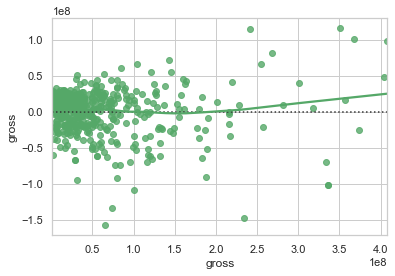

In [12]:
residiuals = y_test - y_test_pred
sns.residplot( y_test, residiuals, lowess=True, color="g")

**Will our model perform better if we try to predict the log of the gross instead?**


In [13]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [14]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

In [15]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)

In [16]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 92042007.08104494


In [17]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 69921304.09887998


## Use the new model to predict the test set.

In [18]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 69921304.09887998
Training:  92042007 vs. Testing:  69921304


## Generate Polynomial and Interaction features

In [19]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget G,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration G,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes G,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes G,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,G^2,G PG-13,G R,G yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,250000000.0,164.0,27000.0,106759.0,0.0,1.0,0.0,4.0,6.250000e+16,4.100000e+10,6.750000e+12,2.668975e+13,0.0,250000000.0,0.0,1.000000e+09,26896.0,4428000.0,17508476.0,0.0,164.0,0.0,656.0,729000000.0,2.882493e+09,0.0,27000.0,0.0,108000.0,1.139748e+10,0.0,106759.0,0.0,427036.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
1,263700000.0,132.0,640.0,1873.0,0.0,1.0,0.0,4.0,6.953769e+16,3.480840e+10,1.687680e+11,4.939101e+11,0.0,263700000.0,0.0,1.054800e+09,17424.0,84480.0,247236.0,0.0,132.0,0.0,528.0,409600.0,1.198720e+06,0.0,640.0,0.0,2560.0,3.508129e+06,0.0,1873.0,0.0,7492.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
2,258000000.0,156.0,24000.0,46055.0,0.0,1.0,0.0,9.0,6.656400e+16,4.024800e+10,6.192000e+12,1.188219e+13,0.0,258000000.0,0.0,2.322000e+09,24336.0,3744000.0,7184580.0,0.0,156.0,0.0,1404.0,576000000.0,1.105320e+09,0.0,24000.0,0.0,216000.0,2.121063e+09,0.0,46055.0,0.0,414495.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,81.0
3,260000000.0,100.0,799.0,2036.0,0.0,0.0,0.0,6.0,6.760000e+16,2.600000e+10,2.077400e+11,5.293600e+11,0.0,0.0,0.0,1.560000e+09,10000.0,79900.0,203600.0,0.0,0.0,0.0,600.0,638401.0,1.626764e+06,0.0,0.0,0.0,4794.0,4.145296e+06,0.0,0.0,0.0,12216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
4,250000000.0,141.0,26000.0,92000.0,0.0,1.0,0.0,1.0,6.250000e+16,3.525000e+10,6.500000e+12,2.300000e+13,0.0,250000000.0,0.0,2.500000e+08,19881.0,3666000.0,12972000.0,0.0,141.0,0.0,141.0,676000000.0,2.392000e+09,0.0,26000.0,0.0,26000.0,8.464000e+09,0.0,92000.0,0.0,92000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)


In [21]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [22]:
X_test.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget G,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration G,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes G,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes G,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,G^2,G PG-13,G R,G yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2
0,-0.765721,0.627458,-0.396733,-0.368000,-0.164308,-0.858595,1.237986,1.575338,-0.490788,-0.659157,-0.440929,-0.397210,-0.125866,-0.556985,0.055800,-0.428666,0.492914,-0.378308,-0.335345,-0.162461,-0.835383,1.400818,1.805365,-0.215396,-0.197527,-0.098141,-0.434452,0.051350,-0.050318,-0.177061,-0.113917,-0.458596,0.128690,0.047690,-0.164308,0.0,0.0,-0.150748,-0.858595,0.0,-0.690655,1.237986,2.336807,1.915592
1,-0.983483,0.065356,-0.648722,-0.638553,-0.164308,-0.858595,1.237986,-1.041634,-0.509224,-0.865369,-0.486389,-0.441261,-0.125866,-0.556985,-0.396922,-0.928659,-0.020872,-0.663132,-0.634239,-0.162461,-0.835383,1.201910,-0.949356,-0.231404,-0.215581,-0.098141,-0.434452,-0.284848,-0.589377,-0.194814,-0.113917,-0.458596,-0.224387,-0.636836,-0.164308,0.0,0.0,-0.150748,-0.858595,0.0,-0.690655,1.237986,0.010341,-0.980133
2,-0.591510,0.065356,0.359233,0.077941,-0.164308,-0.858595,1.237986,1.014558,-0.459448,-0.536889,-0.235893,-0.282216,-0.125866,-0.556985,0.417978,-0.246236,-0.020872,0.342128,0.055303,-0.162461,-0.835383,1.201910,0.968488,-0.052113,-0.082187,-0.098141,-0.434452,1.059943,0.924745,-0.108239,-0.113917,-0.458596,0.710652,0.609638,-0.164308,0.0,0.0,-0.150748,-0.858595,0.0,-0.690655,1.237986,1.838278,0.984823
3,-0.286643,0.678558,-0.564725,-0.411384,-0.164308,-0.858595,1.237986,-0.293928,-0.369113,-0.211728,-0.424229,-0.330530,-0.125866,-0.556985,1.051789,-0.325064,0.542048,-0.561083,-0.378149,-0.162461,-0.835383,1.418901,-0.099799,-0.228203,-0.208415,-0.098141,-0.434452,-0.172782,-0.494249,-0.181128,-0.113917,-0.458596,0.072074,-0.397646,-0.164308,0.0,0.0,-0.150748,-0.858595,0.0,-0.690655,1.237986,0.675046,-0.528851
4,-0.243090,-0.650048,1.283192,1.322336,-0.164308,-0.858595,1.237986,-0.293928,-0.352521,-0.330843,0.334683,0.262992,-0.125866,-0.556985,1.142333,-0.289028,-0.604011,1.007733,0.996822,-0.162461,-0.835383,0.948754,-0.429477,0.382243,0.398509,-0.098141,-0.434452,2.292667,0.900963,0.344256,-0.113917,-0.458596,2.334613,1.022457,-0.164308,0.0,0.0,-0.150748,-0.858595,0.0,-0.690655,1.237986,0.675046,-0.528851


In [23]:
X_train.shape

(1864, 44)

In [24]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 47601649.5589064


In [25]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 50571763.91571413
Training:  47601649 vs. Testing:  50571763


**Given the difference in RMSE between our test and training sets, what can we say about this model?**

In [26]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [27]:
df_poly3.shape

(2330, 164)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [29]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [30]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 51960696.97487588
Training:  45405758 vs. Testing:  51960696


**Given the RMSE on our test and training sets, what can we say about this model?**

# Feature Selection

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](./resources/Filter_1.png)

https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

https://scikit-learn.org/stable/modules/feature_selection.html

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](./resources/FS1.webp)

### Removing Variables based on correlation coefficient

When using this process to find features to remove, I think it is easier/better to do before creating our polynomials or interactions. So I'm going to look at the original 8 features, and search for high correlation in those. 

In [31]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)


In [32]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old
budget,NaN,0.344858,0.195939,0.252826,0.063516,0.177970,0.322966,0.149420
duration,NaN,NaN,0.138879,0.165310,0.132854,0.113966,0.063111,0.016805
actor_1_facebook_likes,NaN,NaN,NaN,0.923668,0.067681,0.006739,0.016741,0.080940
cast_total_facebook_likes,NaN,NaN,NaN,NaN,0.066399,0.029891,0.003500,0.115029
G,NaN,NaN,NaN,NaN,NaN,0.141074,0.132722,0.053875
PG-13,NaN,NaN,NaN,NaN,NaN,NaN,0.693542,0.050073
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060458
yr_old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

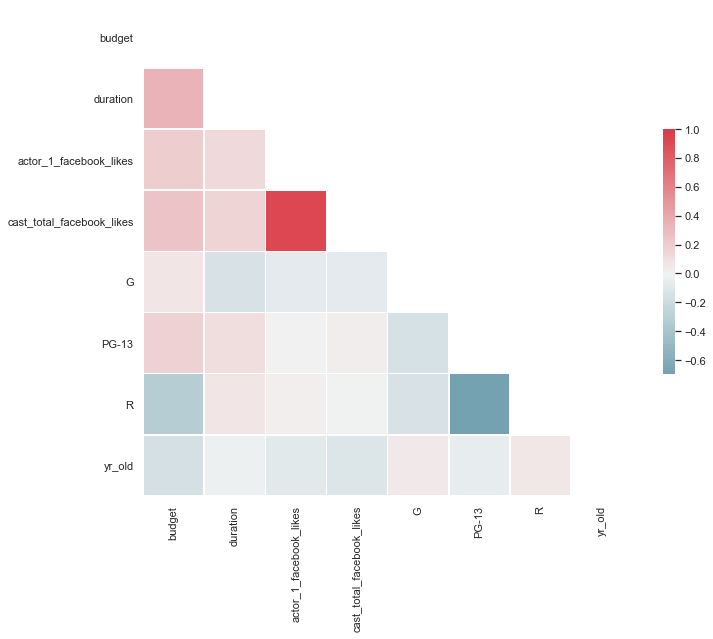

In [33]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)


,budget,duration,actor_1_facebook_likes,G,PG-13,R,yr_old
2872,13000000.0,121.0,4000.0,0,0,1,18.0
4059,3000000.0,110.0,1000.0,0,0,1,4.0
1762,21000000.0,110.0,13000.0,0,0,1,15.0
1739,35000000.0,122.0,2000.0,0,0,1,8.0
1371,37000000.0,96.0,24000.0,0,0,1,8.0
...,...,...,...,...,...,...,...
1030,50000000.0,88.0,11000.0,0,1,0,12.0
1236,40000000.0,139.0,708.0,0,0,1,10.0
899,54000000.0,121.0,117.0,0,0,1,13.0
168,130000000.0,122.0,17000.0,0,1,0,3.0


In [35]:
to_drop

['cast_total_facebook_likes']

In [36]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
# Create correlation matrix
corr_matrix3 = X_train_3.corr().abs()

# Select upper triangle of correlation matrix
upper3 = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
to_drop3 = [column for column in upper3.columns if any(upper3[column] > 0.90)]

to_drop3

['cast_total_facebook_likes',
 'budget^2',
 'budget duration',
 'budget cast_total_facebook_likes',
 'duration^2',
 'duration actor_1_facebook_likes',
 'duration cast_total_facebook_likes',
 'duration G',
 'duration PG-13',
 'duration R',
 'duration yr_old',
 'actor_1_facebook_likes cast_total_facebook_likes',
 'cast_total_facebook_likes^2',
 'cast_total_facebook_likes G',
 'cast_total_facebook_likes PG-13',
 'cast_total_facebook_likes R',
 'cast_total_facebook_likes yr_old',
 'G^2',
 'G yr_old',
 'PG-13^2',
 'R^2',
 'yr_old^2',
 'budget^3',
 'budget^2 duration',
 'budget^2 actor_1_facebook_likes',
 'budget^2 cast_total_facebook_likes',
 'budget^2 G',
 'budget^2 PG-13',
 'budget duration^2',
 'budget duration actor_1_facebook_likes',
 'budget duration cast_total_facebook_likes',
 'budget duration G',
 'budget duration PG-13',
 'budget duration R',
 'budget duration yr_old',
 'budget actor_1_facebook_likes cast_total_facebook_likes',
 'budget cast_total_facebook_likes^2',
 'budget cast_

## Variance Inflation Factor (VIF) 

VIFis a measure of colinearity among predictor variables within a multiple regression. The variance inflation factor for the estimated regression coefficient $b_j$ — denoted $VIF_j$ —is just the factor by which the variance of $b_j$ is "inflated" by the existence of correlation among the predictor variables in the model.In particular, the variance inflation factor for the jth predictor is:

$$VIF_j=\frac{1}{1-R_{j}^{2}}$$


where $R^2_j$  is the $R^2$-value obtained by regressing the jth predictor on the remaining predictors. 


Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://online.stat.psu.edu/stat462/node/180/

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

,VIF Factor,features
0,3.1,budget
1,13.4,duration
2,10.7,actor_1_facebook_likes
3,11.6,cast_total_facebook_likes
4,1.1,G
5,3.8,PG-13
6,4.1,R
7,3.9,yr_old


In [39]:
df_features.corrwith(target).abs()


budget                       0.667271
duration                     0.275608
actor_1_facebook_likes       0.189037
cast_total_facebook_likes    0.278309
G                            0.083650
PG-13                        0.127014
R                            0.248622
yr_old                       0.119039
dtype: float64

## Select the Best features based on some statistical measure

Scikit-learn provides the Select K best features using F-Test.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.



***I am using the F-test to select the 20 top varaibles for this model***

In [40]:
X_train.shape

(1864, 164)

In [3]:
np.sqrt(1864)

43.174066289845804

In [41]:
X_train.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget G,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration G,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes G,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes G,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,G^2,G PG-13,G R,G yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2,budget^3,budget^2 duration,budget^2 actor_1_facebook_likes,budget^2 cast_total_facebook_likes,budget^2 G,budget^2 PG-13,budget^2 R,budget^2 yr_old,budget duration^2,budget duration actor_1_facebook_likes,budget duration cast_total_facebook_likes,budget duration G,budget duration PG-13,budget duration R,budget duration yr_old,budget actor_1_facebook_likes^2,budget actor_1_facebook_likes cast_total_facebook_likes,budget actor_1_facebook_likes G,budget actor_1_facebook_likes PG-13,budget actor_1_facebook_likes R,budget actor_1_facebook_likes yr_old,budget cast_total_facebook_likes^2,budget cast_total_facebook_likes G,budget cast_total_facebook_likes PG-13,budget cast_total_facebook_likes R,budget cast_total_facebook_likes yr_old,budget G^2,budget G PG-13,budget G R,budget G yr_old,budget PG-13^2,budget PG-13 R,budget PG-13 yr_old,budget R^2,budget R yr_old,budget yr_old^2,duration^3,duration^2 actor_1_facebook_likes,duration^2 cast_total_facebook_likes,duration^2 G,duration^2 PG-13,duration^2 R,duration^2 yr_old,duration actor_1_facebook_likes^2,duration actor_1_facebook_likes cast_total_facebook_likes,duration actor_1_facebook_likes G,duration actor_1_facebook_likes PG-13,duration actor_1_facebook_likes R,duration actor_1_facebook_likes yr_old,duration cast_total_facebook_likes^2,duration cast_total_facebook_likes G,duration cast_total_facebook_likes PG-13,duration cast_total_facebook_likes R,duration cast_total_facebook_likes yr_old,duration G^2,duration G PG-13,duration G R,duration G yr_old,duration PG-13^2,duration PG-13 R,duration PG-13 yr_old,duration R^2,duration R yr_old,duration yr_old^2,actor_1_facebook_likes^3,actor_1_facebook_likes^2 cast_total_facebook_likes,actor_1_facebook_likes^2 G,actor_1_facebook_likes^2 PG-13,actor_1_facebook_likes^2 R,actor_1_facebook_likes^2 yr_old,actor_1_facebook_likes cast_total_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes G,actor_1_facebook_likes cast_total_facebook_likes PG-13,actor_1_facebook_likes cast_total_facebook_likes R,actor_1_facebook_likes cast_total_facebook_likes yr_old,actor_1_facebook_likes G^2,actor_1_facebook_likes G PG-13,actor_1_facebook_likes G R,actor_1_facebook_likes G yr_old,actor_1_facebook_likes PG-13^2,actor_1_facebook_likes PG-13 R,actor_1_facebook_likes PG-13 yr_old,actor_1_facebook_likes R^2,actor_1_facebook_likes R yr_old,actor_1_facebook_likes yr_old^2,cast_total_facebook_likes^3,cast_total_facebook_likes^2 G,cast_total_facebook_likes^2 PG-13,cast_total_facebook_likes^2 R,cast_total_facebook_likes^2 yr_old,cast_total_facebook_likes G^2,cast_total_facebook_likes G PG-13,cast_total_facebook_likes G R,cast_total_facebook_likes G yr_old,cast_total_facebook_likes PG-13^2,cast_total_facebook_likes PG-13 R,cast_total_facebook_likes PG-13 yr_old,cast_total_facebook_likes R^2,cast_total_facebook_likes R yr_old,cast_total_facebook_likes yr_old^2,G^3,G^2 PG-13,G^2 R,G^2 yr_old,G PG-13^2,G PG-13 R,G PG-13 yr_old,G R^2,G R yr_old,G yr_old^2,PG-13^3,PG-13^2 R,PG-13^2 yr_old,PG-13 R^2,PG-13 R yr_old,PG-13 yr_old^2,R^3,R^2 yr_old,R yr_old^2,yr_old^3
0,-0.395524,0.474157,-0.648722,-0.548311,-0.164308,1.164693,-0.807764,0.079925,-0.406560,-0.332834,-0.461340,-0.384447,-0.125866,0.125661,-0.532739,-0.280019,0.34793

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=30, score_func=<function f_regression at 0x7fcb8f0574c0>)

In [51]:
selector.get_support()

array([ True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [53]:
list(removed_columns)

['duration',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'G',
 'PG-13',
 'R',
 'yr_old',
 'budget G',
 'budget R',
 'duration^2',
 'duration actor_1_facebook_likes',
 'duration G',
 'duration PG-13',
 'duration R',
 'duration yr_old',
 'actor_1_facebook_likes^2',
 'actor_1_facebook_likes cast_total_facebook_likes',
 'actor_1_facebook_likes G',
 'actor_1_facebook_likes PG-13',
 'actor_1_facebook_likes R',
 'actor_1_facebook_likes yr_old',
 'cast_total_facebook_likes^2',
 'cast_total_facebook_likes G',
 'cast_total_facebook_likes R',
 'cast_total_facebook_likes yr_old',
 'G^2',
 'G PG-13',
 'G R',
 'G yr_old',
 'PG-13^2',
 'PG-13 R',
 'PG-13 yr_old',
 'R^2',
 'R yr_old',
 'yr_old^2',
 'budget^2 G',
 'budget^2 R',
 'budget duration G',
 'budget duration R',
 'budget actor_1_facebook_likes^2',
 'budget actor_1_facebook_likes cast_total_facebook_likes',
 'budget actor_1_facebook_likes G',
 'budget actor_1_facebook_likes R',
 'budget cast_total_facebook_likes G',
 'budget cast_

In [54]:
list(selected_columns)

['budget',
 'budget^2',
 'budget duration',
 'budget actor_1_facebook_likes',
 'budget cast_total_facebook_likes',
 'budget PG-13',
 'budget yr_old',
 'duration cast_total_facebook_likes',
 'cast_total_facebook_likes PG-13',
 'budget^3',
 'budget^2 duration',
 'budget^2 actor_1_facebook_likes',
 'budget^2 cast_total_facebook_likes',
 'budget^2 PG-13',
 'budget^2 yr_old',
 'budget duration^2',
 'budget duration actor_1_facebook_likes',
 'budget duration cast_total_facebook_likes',
 'budget duration PG-13',
 'budget duration yr_old',
 'budget actor_1_facebook_likes PG-13',
 'budget actor_1_facebook_likes yr_old',
 'budget cast_total_facebook_likes^2',
 'budget cast_total_facebook_likes PG-13',
 'budget cast_total_facebook_likes yr_old',
 'budget PG-13^2',
 'budget PG-13 yr_old',
 'duration^2 cast_total_facebook_likes',
 'duration cast_total_facebook_likes PG-13',
 'cast_total_facebook_likes PG-13^2']

Now let's use those 20 columns to fit a model and see how it performs. 

In [55]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)




Training Root Mean Squared Error: 48298190.35240421
Testing Root Mean Squared Error: 49362751.1959043


In [56]:
list(zip(selected_columns, lm_kbest.coef_))

[('budget', 25437087.528467048),
 ('budget^2', 27797673.51560506),
 ('budget duration', 19638409.71352907),
 ('budget actor_1_facebook_likes', -60476869.90789011),
 ('budget cast_total_facebook_likes', 37609812.02866819),
 ('budget PG-13', -24675755.815247364),
 ('budget yr_old', 13896040.509220656),
 ('duration cast_total_facebook_likes', 11591959.24069118),
 ('cast_total_facebook_likes PG-13', -2819953.6964438553),
 ('budget^3', -18244050.955940556),
 ('budget^2 duration', -8106716.955017301),
 ('budget^2 actor_1_facebook_likes', 11547394.111200813),
 ('budget^2 cast_total_facebook_likes', -10041258.597124532),
 ('budget^2 PG-13', -13660045.658119418),
 ('budget^2 yr_old', 9377043.75520395),
 ('budget duration^2', -2844630.7912091827),
 ('budget duration actor_1_facebook_likes', 21346790.081232224),
 ('budget duration cast_total_facebook_likes', -2234541.4399706563),
 ('budget duration PG-13', 53709972.99040826),
 ('budget duration yr_old', -28354955.3428672),
 ('budget actor_1_faceb

In [49]:
print('Poly_3: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Poly_3:  51960696.97487588 
 KBest:    49744971.48022453 



# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.



![alt text](./resources/Wrapper_1.webp)

### Recursive Feature Elimination

An example if a wrapper method is the recursive feature elimination algorithm.

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.


Recursive elimination eliminates the least explaining features one after the other.
For data with n features,

- On first round ‘n-1’ models are created with combination of all features except one. The least performing feature is removed

- On second round ‘n-2’ models are created by removing another feature.



<img src='./resources/rfe_graph.png' width=500/>

In [57]:
from sklearn.feature_selection import RFECV

In [59]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=7, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)



Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [60]:
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]


In [61]:
list(removed_rfe)

['budget^2',
 'budget duration',
 'budget yr_old',
 'duration cast_total_facebook_likes',
 'cast_total_facebook_likes PG-13',
 'budget^3',
 'budget^2 duration',
 'budget^2 actor_1_facebook_likes',
 'budget^2 cast_total_facebook_likes',
 'budget duration^2',
 'budget duration actor_1_facebook_likes',
 'budget duration cast_total_facebook_likes',
 'budget duration yr_old',
 'budget actor_1_facebook_likes PG-13',
 'budget actor_1_facebook_likes yr_old',
 'budget cast_total_facebook_likes^2',
 'budget cast_total_facebook_likes PG-13',
 'budget cast_total_facebook_likes yr_old',
 'budget PG-13 yr_old',
 'duration^2 cast_total_facebook_likes',
 'duration cast_total_facebook_likes PG-13',
 'cast_total_facebook_likes PG-13^2']

In [62]:
len(list(selected_rfe))

8

In [63]:
selected_rfe

Index(['budget', 'budget actor_1_facebook_likes',
       'budget cast_total_facebook_likes', 'budget PG-13', 'budget^2 PG-13',
       'budget^2 yr_old', 'budget duration PG-13', 'budget PG-13^2'],
      dtype='object')

Now let's use those selected features to fit a model.

In [64]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 49011308.3561174
Testing Root Mean Squared Error: 50160677.25165589


In [65]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  51960696.97487588 
 KBest:    49362751.1959043 
 RFE:      50160677.25165589


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](./resources/Embedded_1.webp)

In [66]:

X_train.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG-13,R,yr_old,budget^2,budget duration,budget actor_1_facebook_likes,budget cast_total_facebook_likes,budget G,budget PG-13,budget R,budget yr_old,duration^2,duration actor_1_facebook_likes,duration cast_total_facebook_likes,duration G,duration PG-13,duration R,duration yr_old,actor_1_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes,actor_1_facebook_likes G,actor_1_facebook_likes PG-13,actor_1_facebook_likes R,actor_1_facebook_likes yr_old,cast_total_facebook_likes^2,cast_total_facebook_likes G,cast_total_facebook_likes PG-13,cast_total_facebook_likes R,cast_total_facebook_likes yr_old,G^2,G PG-13,G R,G yr_old,PG-13^2,PG-13 R,PG-13 yr_old,R^2,R yr_old,yr_old^2,budget^3,budget^2 duration,budget^2 actor_1_facebook_likes,budget^2 cast_total_facebook_likes,budget^2 G,budget^2 PG-13,budget^2 R,budget^2 yr_old,budget duration^2,budget duration actor_1_facebook_likes,budget duration cast_total_facebook_likes,budget duration G,budget duration PG-13,budget duration R,budget duration yr_old,budget actor_1_facebook_likes^2,budget actor_1_facebook_likes cast_total_facebook_likes,budget actor_1_facebook_likes G,budget actor_1_facebook_likes PG-13,budget actor_1_facebook_likes R,budget actor_1_facebook_likes yr_old,budget cast_total_facebook_likes^2,budget cast_total_facebook_likes G,budget cast_total_facebook_likes PG-13,budget cast_total_facebook_likes R,budget cast_total_facebook_likes yr_old,budget G^2,budget G PG-13,budget G R,budget G yr_old,budget PG-13^2,budget PG-13 R,budget PG-13 yr_old,budget R^2,budget R yr_old,budget yr_old^2,duration^3,duration^2 actor_1_facebook_likes,duration^2 cast_total_facebook_likes,duration^2 G,duration^2 PG-13,duration^2 R,duration^2 yr_old,duration actor_1_facebook_likes^2,duration actor_1_facebook_likes cast_total_facebook_likes,duration actor_1_facebook_likes G,duration actor_1_facebook_likes PG-13,duration actor_1_facebook_likes R,duration actor_1_facebook_likes yr_old,duration cast_total_facebook_likes^2,duration cast_total_facebook_likes G,duration cast_total_facebook_likes PG-13,duration cast_total_facebook_likes R,duration cast_total_facebook_likes yr_old,duration G^2,duration G PG-13,duration G R,duration G yr_old,duration PG-13^2,duration PG-13 R,duration PG-13 yr_old,duration R^2,duration R yr_old,duration yr_old^2,actor_1_facebook_likes^3,actor_1_facebook_likes^2 cast_total_facebook_likes,actor_1_facebook_likes^2 G,actor_1_facebook_likes^2 PG-13,actor_1_facebook_likes^2 R,actor_1_facebook_likes^2 yr_old,actor_1_facebook_likes cast_total_facebook_likes^2,actor_1_facebook_likes cast_total_facebook_likes G,actor_1_facebook_likes cast_total_facebook_likes PG-13,actor_1_facebook_likes cast_total_facebook_likes R,actor_1_facebook_likes cast_total_facebook_likes yr_old,actor_1_facebook_likes G^2,actor_1_facebook_likes G PG-13,actor_1_facebook_likes G R,actor_1_facebook_likes G yr_old,actor_1_facebook_likes PG-13^2,actor_1_facebook_likes PG-13 R,actor_1_facebook_likes PG-13 yr_old,actor_1_facebook_likes R^2,actor_1_facebook_likes R yr_old,actor_1_facebook_likes yr_old^2,cast_total_facebook_likes^3,cast_total_facebook_likes^2 G,cast_total_facebook_likes^2 PG-13,cast_total_facebook_likes^2 R,cast_total_facebook_likes^2 yr_old,cast_total_facebook_likes G^2,cast_total_facebook_likes G PG-13,cast_total_facebook_likes G R,cast_total_facebook_likes G yr_old,cast_total_facebook_likes PG-13^2,cast_total_facebook_likes PG-13 R,cast_total_facebook_likes PG-13 yr_old,cast_total_facebook_likes R^2,cast_total_facebook_likes R yr_old,cast_total_facebook_likes yr_old^2,G^3,G^2 PG-13,G^2 R,G^2 yr_old,G PG-13^2,G PG-13 R,G PG-13 yr_old,G R^2,G R yr_old,G yr_old^2,PG-13^3,PG-13^2 R,PG-13^2 yr_old,PG-13 R^2,PG-13 R yr_old,PG-13 yr_old^2,R^3,R^2 yr_old,R yr_old^2,yr_old^3
0,-0.395524,0.474157,-0.648722,-0.548311,-0.164308,1.164693,-0.807764,0.079925,-0.406560,-0.332834,-0.461340,-0.384447,-0.125866,0.125661,-0.532739,-0.280019,0.34793

***Plot to compare the size of all of our coefficients form our final model created by RFE***

<AxesSubplot:title={'center':'Modal Coefficients'}>

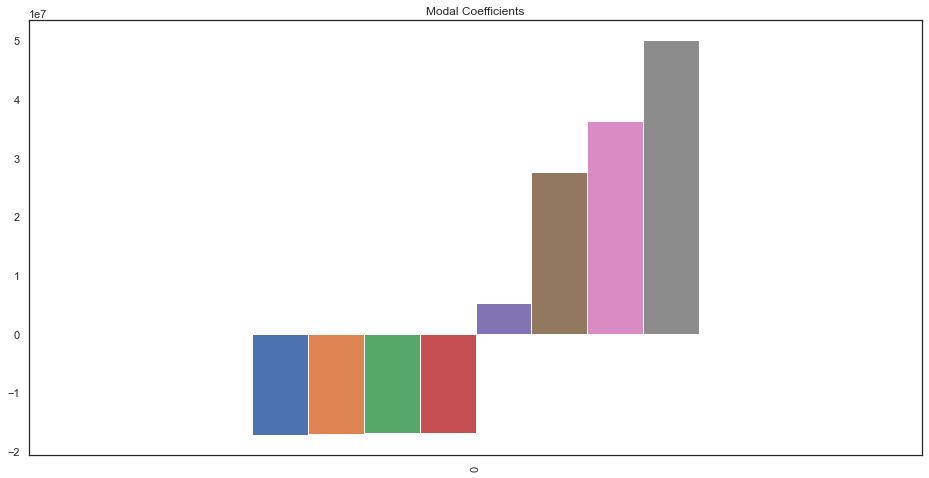

In [67]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [68]:
model_coef.T

,0
budget^2 PG-13,-1.732406e+07
budget actor_1_facebook_likes,-1.714573e+07
budget PG-13^2,-1.689323e+07
budget PG-13,-1.689323e+07
budget^2 yr_old,5.322781e+06
budget cast_total_facebook_likes,2.750536e+07
budget,3.629207e+07
budget duration PG-13,5.007506e+07


In [69]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100, normalize=False)

lasso.fit(X_train[selected_rfe],y_train)

y_train_pred = lasso.predict(X_train[selected_rfe])
y_pred = lasso.predict(X_test[selected_rfe])

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )




Training Error: 33221482.27932007
Testing Error: 50160700.9625923


/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.376401596707208e+17, tolerance: 881299128230396.4
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:title={'center':'Modal Coefficients'}>

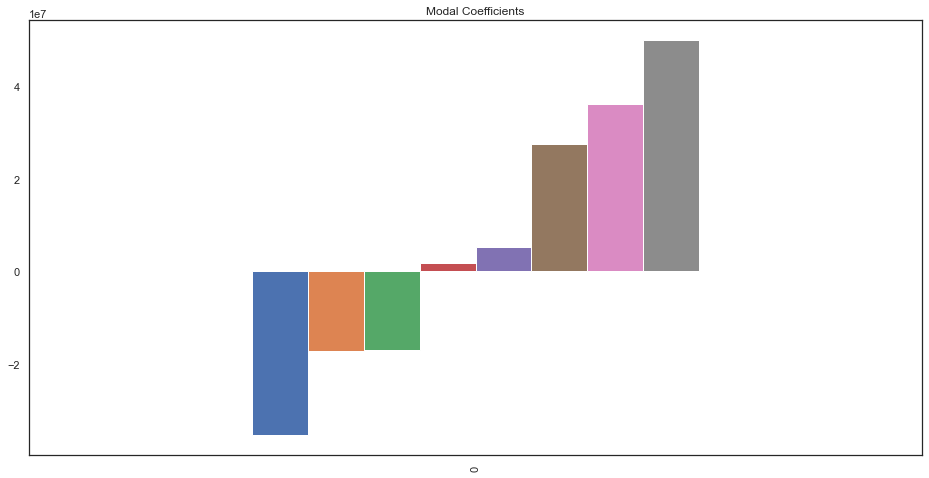

In [70]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train[selected_rfe].columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [71]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0]

,0


In [72]:
coeff_df

,0
budget PG-13^2,-3.554126e+07
budget^2 PG-13,-1.732185e+07
budget actor_1_facebook_likes,-1.714432e+07
budget PG-13,1.754878e+06
budget^2 yr_old,5.322923e+06
budget cast_total_facebook_likes,2.750387e+07
budget,3.629133e+07
budget duration PG-13,5.007353e+07


In [73]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 10: \t",  test_rmse_lasso01, '\n')

Original: 	 51960696.97487588 
 KBest: 	 49362751.1959043 
 RFE: 	 	 50160677.25165589 
 Lasso 10: 	 50160700.9625923 



## Application: when do we use which method?

Lasso probably appears to be the easiest method to use to select the features of your model. So why would you bother with any of the other methods?  

A Lasso algorithm is only for linear models, and you might rather use a different machine learning algorithm like K-Nearest Neighbors. Therefore, a filter or wrapper method could be used to perform your feature selection.

You might start off with hundreds or thousands of features that you want to select from. This could take a while to run a wrapper or embedded method, so you can use a filter method first to reduce your model size and have it run more quickly.  

Finally you can also combine these methods together. So you might start with a filter method to remove some of the features that are obviously non-impactful to our target variable, then run a wrapper or embedded method to finish the process. 

## Final Model:

During this whole process we were only using a percentage of our data to train the model so that we can do test train split.  

Now we have identified the process that generate the model that performs the best, we want to go back and fit it to all available data to get a final model.  



In [74]:
selector = SelectKBest(f_regression, k=30)

selector.fit(df_poly3, target)

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=30, score_func=<function f_regression at 0x7fcb8f0574c0>)

In [75]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [76]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df_poly3[selected_columns], target)

In [77]:
lm_final.coef_

array([ 4.03007966e-04,  1.59430405e-09,  9.29286846e-03, -4.27204910e-05,
        2.12513566e-05,  3.68542209e-05,  9.40837856e-04, -1.71634946e-06,
       -2.85709589e-09, -8.66548337e-18,  1.65039987e-11, -5.38523320e-14,
        5.78221752e-15, -3.64895423e-09,  1.90019798e-10, -3.08565405e-05,
        2.42708102e-07, -8.85563923e-08,  2.44192859e-03, -2.30184641e-04,
       -7.44475485e-07,  1.57872956e-07, -1.82677803e-11,  6.08260995e-06,
        6.88478429e-07,  3.68542110e-05,  2.04697015e-04, -3.44157981e-04,
       -3.21611613e-07, -2.85483566e-09])

Now that we have that final model, we want to save it to use again.

In [ ]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [ ]:
# df = df[df['sqft']<100000]